## 1- Importing Libraries

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Image

Text(0.5, 1.0, 'Binary')

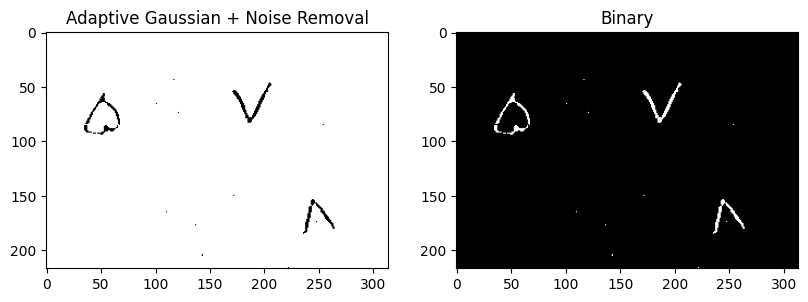

In [2]:
image = cv.imread("adad.jpg", 0)

noise_removed_image = cv.medianBlur(image,5)

output = cv.adaptiveThreshold(noise_removed_image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,11,3)

binary = cv.bitwise_not(output)


plt.figure(figsize=[15,15])

plt.subplot(332);plt.imshow(output, cmap='gray');plt.title("Adaptive Gaussian + Noise Removal")
plt.subplot(333);plt.imshow(binary, cmap='gray');plt.title("Binary")

## 3- Finding Centers

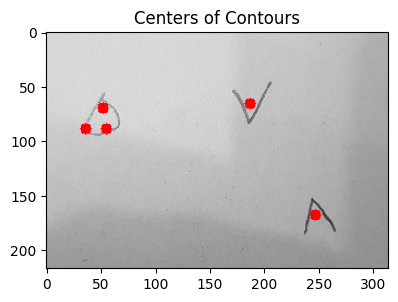

In [4]:
binary_image = cv.threshold(binary, 245, 255, cv.THRESH_BINARY)[1]

gray = cv.cvtColor(image, cv.COLOR_GRAY2BGR)

contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)


for c in contours:
    M = cv.moments(c)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv.circle(gray, (cX, cY), 5, (255, 0, 0), -1)


plt.figure(figsize=[15,15])

plt.subplot(334)
plt.imshow(gray, cmap='gray')
plt.title("Centers of Contours")
plt.show()

## 4- Drawing a Rectangle

In [101]:
boundRect = cv.boundingRect(contours[4])
centers, radius = cv.minEnclosingCircle(contours[4])

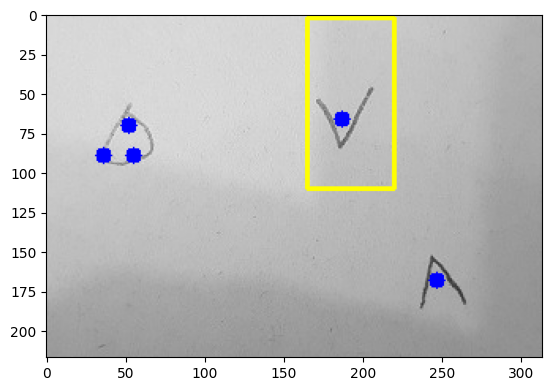

In [134]:
drawing = gray.copy()

cv.rectangle(drawing, (int(boundRect[1]), int(boundRect[0])), \
  (int(boundRect[0]+boundRect[0]), int(boundRect[2]+boundRect[3])), (0,255,255), 2)

plt.imshow(drawing[...,::-1])